In [53]:
import numpy as np
import pandas as pd


import joblib

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans


In [10]:
df = pd.read_csv ('/Users/bkannadasan/Documents/GitHub/DS_New_30_Nov_2024/MachineLearning/Unsupervised_Learning/Customer_Data.csv')

In [12]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [27]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [35]:
df_orig = df.copy()

In [41]:
df_orig.head(1)

CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001  40.900749           0.818182       95.4               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4           0.0             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  201.802084        139.509787               0.0      12

In [45]:
df.drop(columns=['CUST_ID'], inplace=True)

In [47]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [65]:
model = KMeans(2,random_state=42)
model.fit(df)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [67]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [92]:
model = KMeans(2,random_state=42)
model.fit(df.dropna())

KMeans(n_clusters=2, random_state=42)

In [96]:
joblib.dump(model,'model_kmeans.pkl')

['model_kmeans.pkl']

In [74]:
df.iloc[0]

BALANCE                               40.900749
BALANCE_FREQUENCY                      0.818182
PURCHASES                             95.400000
ONEOFF_PURCHASES                       0.000000
INSTALLMENTS_PURCHASES                95.400000
CASH_ADVANCE                           0.000000
PURCHASES_FREQUENCY                    0.166667
ONEOFF_PURCHASES_FREQUENCY             0.000000
PURCHASES_INSTALLMENTS_FREQUENCY       0.083333
CASH_ADVANCE_FREQUENCY                 0.000000
CASH_ADVANCE_TRX                       0.000000
PURCHASES_TRX                          2.000000
CREDIT_LIMIT                        1000.000000
PAYMENTS                             201.802084
MINIMUM_PAYMENTS                     139.509787
PRC_FULL_PAYMENT                       0.000000
TENURE                                12.000000
Name: 0, dtype: float64

In [80]:
df.iloc[:1]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  40.900749           0.818182       95.4               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4           0.0             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  201.802084        139.509787               0.0      12

In [82]:
df.iloc[1]

BALANCE                             3202.467416
BALANCE_FREQUENCY                      0.909091
PURCHASES                              0.000000
ONEOFF_PURCHASES                       0.000000
INSTALLMENTS_PURCHASES                 0.000000
CASH_ADVANCE                        6442.945483
PURCHASES_FREQUENCY                    0.000000
ONEOFF_PURCHASES_FREQUENCY             0.000000
PURCHASES_INSTALLMENTS_FREQUENCY       0.000000
CASH_ADVANCE_FREQUENCY                 0.250000
CASH_ADVANCE_TRX                       4.000000
PURCHASES_TRX                          0.000000
CREDIT_LIMIT                        7000.000000
PAYMENTS                            4103.032597
MINIMUM_PAYMENTS                    1072.340217
PRC_FULL_PAYMENT                       0.222222
TENURE                                12.000000
Name: 1, dtype: float64

In [84]:
# testing the pickle file

loaded_model = joblib.load('model_kmeans.pkl')
loaded_model.predict(df.iloc[0])

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [104]:
loaded_model = joblib.load('model_kmeans.pkl')

In [120]:
loaded_model.predict(df.iloc[[1000]])

array([0], dtype=int32)

In [110]:
df.shape

(8950, 17)

In [122]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [124]:
df['MINIMUM_PAYMENTS'].nunique()

8636

In [132]:
df['MINIMUM_PAYMENTS'].isna().sum()/df.shape[0]*100

3.4972067039106145

<Axes: >

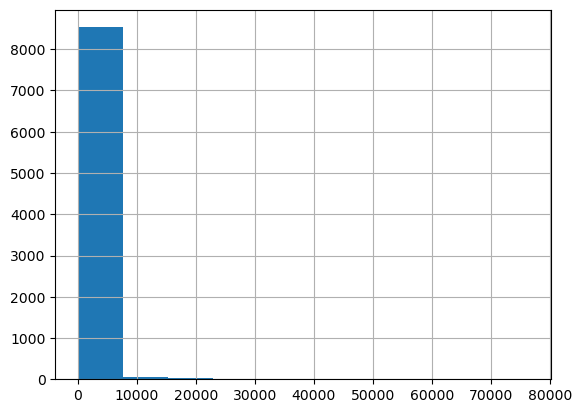

In [134]:
df['MINIMUM_PAYMENTS'].hist()

<Axes: ylabel='Density'>

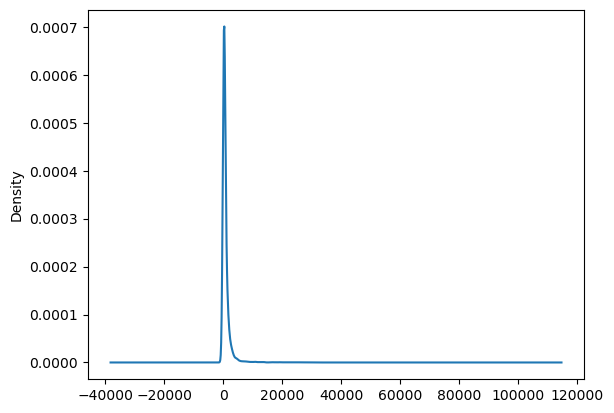

In [136]:
df['MINIMUM_PAYMENTS'].plot(kind='kde')

In [138]:
import seaborn as sns

<Axes: xlabel='MINIMUM_PAYMENTS', ylabel='Density'>

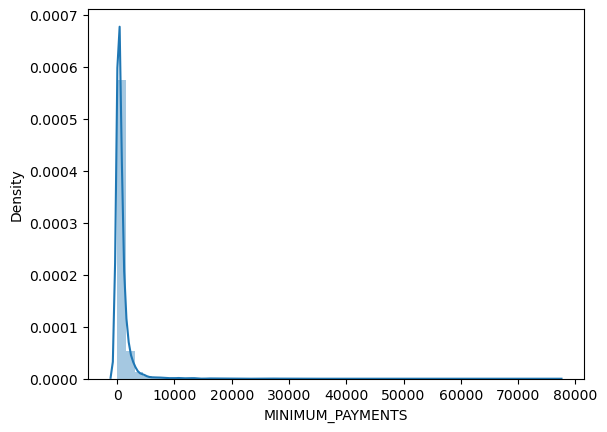

In [142]:
sns.distplot(df['MINIMUM_PAYMENTS'])

In [146]:
df['MINIMUM_PAYMENTS'].mean()

864.2065423050828

In [148]:
df['MINIMUM_PAYMENTS'].min(),df['MINIMUM_PAYMENTS'].max()

(0.019163, 76406.20752)

In [152]:
df['MINIMUM_PAYMENTS'].median()

312.343947

In [156]:
df['MINIMUM_PAYMENTS'].mode()

0    299.351881
Name: MINIMUM_PAYMENTS, dtype: float64

<Axes: xlabel='MINIMUM_PAYMENTS'>

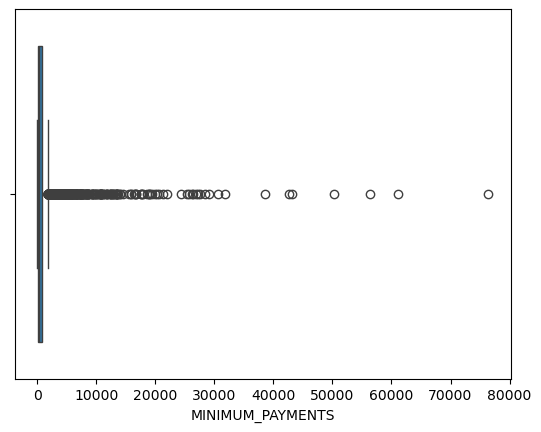

In [161]:
sns.boxplot(data=df,x='MINIMUM_PAYMENTS')

In [163]:
df['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [167]:
df[df['MINIMUM_PAYMENTS']<1000]['MINIMUM_PAYMENTS'].describe()

count    6859.000000
mean      320.031459
std       239.799692
min         0.019163
25%       153.940739
50%       215.208576
75%       454.630698
max       999.725550
Name: MINIMUM_PAYMENTS, dtype: float64

In [175]:
df[df['MINIMUM_PAYMENTS']<1000]['MINIMUM_PAYMENTS'].describe()/df.shape[0]*100

count    76.636872
mean      3.575770
std       2.679326
min       0.000214
25%       1.720008
50%       2.404565
75%       5.079673
max      11.170118
Name: MINIMUM_PAYMENTS, dtype: float64

In [177]:
df[df['MINIMUM_PAYMENTS']<1000]['MINIMUM_PAYMENTS'].nunique()/df.shape[0]*100

76.62569832402235

In [179]:
df[df['MINIMUM_PAYMENTS']>1000]['MINIMUM_PAYMENTS'].describe()/df.shape[0]*100

count     19.865922
mean      33.111437
std       51.903606
min       11.175490
25%       14.387347
50%       19.428519
75%       30.484681
max      853.700643
Name: MINIMUM_PAYMENTS, dtype: float64

In [183]:
df[df['MINIMUM_PAYMENTS']>1000]['MINIMUM_PAYMENTS'].nunique()/df.shape[0]*100

19.8659217877095

In [188]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [192]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [194]:
df['CREDIT_LIMIT'].nunique()

205

In [196]:
df['CREDIT_LIMIT'].unique()

array([ 1000.      ,  7000.      ,  7500.      ,  1200.      ,
        1800.      , 13500.      ,  2300.      , 11000.      ,
        2000.      ,  3000.      ,  8000.      ,  2500.      ,
       13000.      ,  4000.      , 11250.      ,  9000.      ,
        6000.      ,  1700.      , 10500.      ,  6900.      ,
        5000.      ,  4500.      ,  1500.      ,  8500.      ,
        2400.      ,  4200.      ,  3300.      , 12000.      ,
        3500.      ,  6500.      ,  1600.      ,  4150.      ,
        1850.      ,  6250.      ,  2250.      ,  9500.      ,
       16500.      ,  5700.      ,  5500.      , 17000.      ,
        3200.      , 19000.      ,  2800.      , 18000.      ,
       21500.      , 10000.      , 20000.      ,  7900.      ,
       15000.      , 12500.      , 14000.      ,  5300.      ,
         900.      ,  6150.      , 11500.      , 23000.      ,
        2700.      , 14500.      , 19500.      ,  1400.      ,
        2900.      ,  1950.      ,  7200.      , 10950.

In [198]:
df['CREDIT_LIMIT'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [202]:
df['CREDIT_LIMIT'].mean()

4494.449450364621

In [207]:
df['CREDIT_LIMIT'].median()

3000.0

In [209]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [211]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [236]:
df.duplicated().sum()

0

In [242]:
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8950.0  4494.449450  3638.612411  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8950.0   864.206542  2330.588021   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   170.857654   335.628312   864.206542   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [224]:
from sklearn.preprocessing import StandardScaler

In [244]:
scale = StandardScaler()

In [246]:
scaled_df = scale.fit_transform(df)

In [248]:
scaled_df = pd.DataFrame(scale_df,columns=df.columns)

In [252]:
scaled_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989          -0.249434  -0.424900         -0.356934   
1     0.786961           0.134325  -0.469552         -0.356934   
2     0.447135           0.518084  -0.107668          0.108889   
3     0.049099          -1.016953   0.232058          0.546189   
4    -0.358775           0.518084  -0.462063         -0.347294   
...        ...                ...        ...               ...   
8945 -0.737950           0.518084  -0.333293         -0.356934   
8946 -0.742423           0.518084  -0.329136         -0.356934   
8947 -0.740398          -0.185477  -0.401965         -0.356934   
8948 -0.745174          -0.185477  -0.469552         -0.356934   
8949 -0.572575          -0.889033   0.042146          0.301732   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.349079     -0.466786            -0.806490   
1                  -0.454576      2.605605            -1.221758   
2                  -0.454576     -0.466786             1.269843   
3                  -0.454576     -0.368653            -1.014125   
4                  -0.454576     -0.466786            -1.014125   
...                      ...           ...                  ...   
8945               -0.132643     -0.466786             1.269843   
8946               -0.122823     -0.466786             1.269843   
8947               -0.294893     -0.466786             0.854576   
8948               -0.454576     -0.449352            -1.221758   
8949               -0.454576     -0.406205             0.439310   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.678661                         -0.707313   
1                      -0.678661                         -0.916995   
2                       2.673451                         -0.916995   
3                      -0.399319                         -0.916995   
4                      -0.399319                         -0.916995   
...                          ...                               ...   
8945                   -0.678661                          1.179833   
8946                   -0.678661                          1.179833   
8947                   -0.678661                          0.760469   
8948                   -0.678661                         -0.916995   
8949                    1.556082                         -0.916995   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.675349         -0.476070      -0.511333     -0.960433   
1                   0.573963          0.110074      -0.591796      0.688639   
2                  -0.675349         -0.476070      -0.109020      0.826062   
3                  -0.258913         -0.329534      -0.551565      0.826062   
4                  -0.675349         -0.476070      -0.551565     -0.905464   
...                      ...               ...            ...           ...   
8945               -0.675349         -0.476070      -0.350408     -0.960433   
8946               -0.675349         -0.476070      -0.350408     -0.960433   
8947               -0.675349         -0.476070      -0.390639     -0.960433   
8948                0.157527         -0.182998      -0.591796     -1.097856   
8949                0.990398         -0.182998       0.333524     -0.905464   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -0.528979     -3.109675e-01         -0.525551  0.360680  
1     0.818642      8.931021e-02          0.234227  0.360680  
2    -0.383805     -1.016632e-01         -0.525551  0.360680  
3    -0.598688      4.878305e-17         -0.525551  0.360680  
4    -0.364368     -2.657913e-01         -0.525551  0.360680  
...        ...               ...               ...       ...  
8945 -0.486217     -3.498541e-01          1.183951 -4.122768  
8946 -0.503396      4.878305e-17         -0.525551 -4.122768  
8947 -0.570615     -3.354655e-01          0.329200 -

In [260]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Eblow method to find the optimal K value')

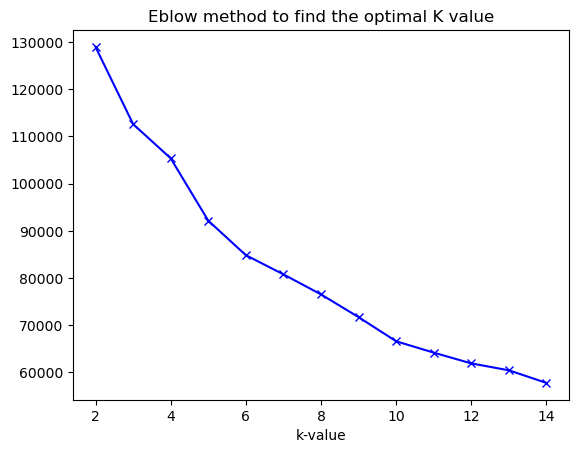

In [272]:
# To find optimal K value (neighbours)

inertia = []

range_val = range (2,15)
for i in range_val:
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_df)
    pred = kmeans.predict(scaled_df)
    inertia.append(kmeans.inertia_)


plt.plot (range_val,inertia,'bx-')
plt.xlabel('k-value')
plt.title('Eblow method to find the optimal K value')

In [280]:
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(scaled_df)

KMeans(n_clusters=5, random_state=42)

In [292]:
kmeans.predict(scaled_df.iloc[[1000]])

array([3], dtype=int32)

In [294]:
model = KMeans(n_clusters=4,random_state=42)
model.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [296]:
model.predict(scaled_df)

array([3, 0, 2, ..., 1, 3, 1], dtype=int32)

In [300]:
model.labels_

array([3, 0, 2, ..., 1, 3, 1], dtype=int32)

In [302]:
scaled_df_k4 = pd.concat([scaled_df,pd.DataFrame({'cluster':model.labels_})],axis=1)

In [304]:
scaled_df_k4

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989          -0.249434  -0.424900         -0.356934   
1     0.786961           0.134325  -0.469552         -0.356934   
2     0.447135           0.518084  -0.107668          0.108889   
3     0.049099          -1.016953   0.232058          0.546189   
4    -0.358775           0.518084  -0.462063         -0.347294   
...        ...                ...        ...               ...   
8945 -0.737950           0.518084  -0.333293         -0.356934   
8946 -0.742423           0.518084  -0.329136         -0.356934   
8947 -0.740398          -0.185477  -0.401965         -0.356934   
8948 -0.745174          -0.185477  -0.469552         -0.356934   
8949 -0.572575          -0.889033   0.042146          0.301732   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.349079     -0.466786            -0.806490   
1                  -0.454576      2.605605            -1.221758   
2                  -0.454576     -0.466786             1.269843   
3                  -0.454576     -0.368653            -1.014125   
4                  -0.454576     -0.466786            -1.014125   
...                      ...           ...                  ...   
8945               -0.132643     -0.466786             1.269843   
8946               -0.122823     -0.466786             1.269843   
8947               -0.294893     -0.466786             0.854576   
8948               -0.454576     -0.449352            -1.221758   
8949               -0.454576     -0.406205             0.439310   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.678661                         -0.707313   
1                      -0.678661                         -0.916995   
2                       2.673451                         -0.916995   
3                      -0.399319                         -0.916995   
4                      -0.399319                         -0.916995   
...                          ...                               ...   
8945                   -0.678661                          1.179833   
8946                   -0.678661                          1.179833   
8947                   -0.678661                          0.760469   
8948                   -0.678661                         -0.916995   
8949                    1.556082                         -0.916995   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.675349         -0.476070      -0.511333     -0.960433   
1                   0.573963          0.110074      -0.591796      0.688639   
2                  -0.675349         -0.476070      -0.109020      0.826062   
3                  -0.258913         -0.329534      -0.551565      0.826062   
4                  -0.675349         -0.476070      -0.551565     -0.905464   
...                      ...               ...            ...           ...   
8945               -0.675349         -0.476070      -0.350408     -0.960433   
8946               -0.675349         -0.476070      -0.350408     -0.960433   
8947               -0.675349         -0.476070      -0.390639     -0.960433   
8948                0.157527         -0.182998      -0.591796     -1.097856   
8949                0.990398         -0.182998       0.333524     -0.905464   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  cluster  
0    -0.528979     -3.109675e-01         -0.525551  0.360680        3  
1     0.818642      8.931021e-02          0.234227  0.360680        0  
2    -0.383805     -1.016632e-01         -0.525551  0.360680        2  
3    -0.598688      4.878305e-17         -0.525551  0.360680        3  
4    -0.364368     -2.657913e-01         -0.525551  0.360680        3  
...        ...               ...               ...       ...      ...  
8945 -0.486217     -3.498541e-01          1.183951 -4.122768        2  
8946 -0.503396      4.878305e-17         -0

<Axes: xlabel='PURCHASES', ylabel='PAYMENTS'>

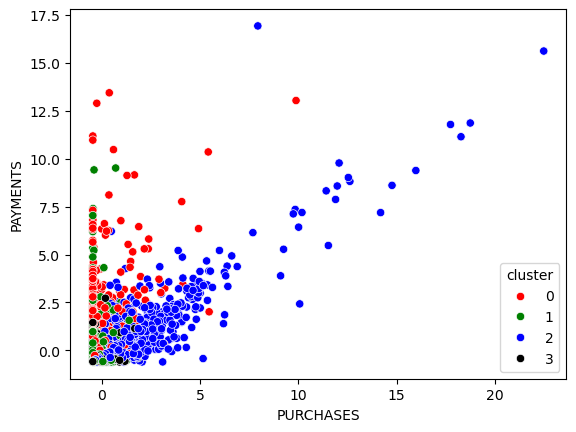

In [314]:
sns.scatterplot(data=scaled_df_k4,x='PURCHASES',y='PAYMENTS',hue='cluster', palette=['red','green','blue','black'])

In [320]:
scaled_df_k4.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'cluster'],
      dtype='object')

In [322]:
sns.scatterplot(data=scaled_df_k4,x='PURCHASES',y='TENURE',hue='cluster', palette=['red','green','blue','black'])

<Axes: xlabel='PURCHASES', ylabel='TENURE'>

<Axes: xlabel='PURCHASES', ylabel='CREDIT_LIMIT'>

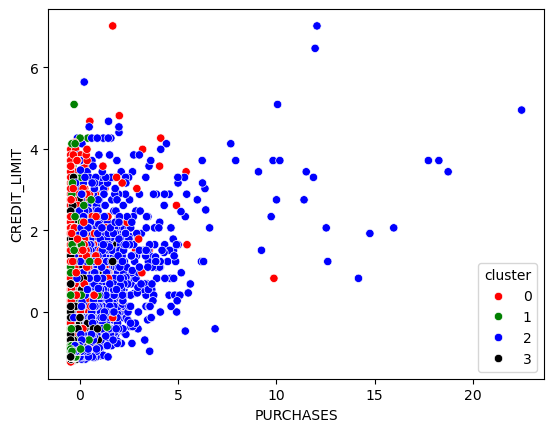

In [336]:
sns.scatterplot(data=scaled_df_k4,x='PURCHASES',y='CREDIT_LIMIT',hue='cluster', palette=['red','green','blue','black'])

<Axes: xlabel='BALANCE', ylabel='CREDIT_LIMIT'>

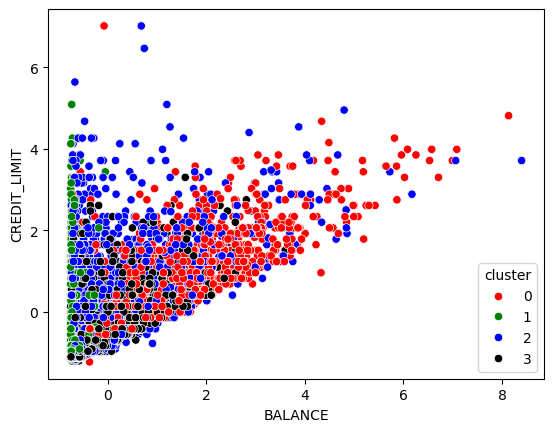

In [342]:
sns.scatterplot(data=scaled_df_k4,x='BALANCE',y='CREDIT_LIMIT',hue='cluster', palette=['red','green','blue','black'])

In [332]:
sns.pairplot(data=scaled_df_k4)

In [334]:
sns.scatterplot(data=scaled_df_k4,x='PURCHASES_INSTALLMENTS_FREQUENCY',y='ONEOFF_PURCHASES_FREQUENCY',hue='cluster', palette=['red','green','blue','black'])

<Axes: xlabel='PURCHASES_INSTALLMENTS_FREQUENCY', ylabel='ONEOFF_PURCHASES_FREQUENCY'>

In [344]:
cluster_df = pd.concat([df,pd.DataFrame({'cluster':model.labels_})],axis=1)


In [346]:
cluster_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        3  
1     4103.032597       1072.340217          0.222222      12        0  
2      622.066742        627.284787          0.000000      12        2  
3        0.000000        864.206542          0.000000      12        3  
4      678.334763        244.791237          0.000000      12        3  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        2  
89

In [350]:
cluster_0_df = cluster_df [cluster_df['cluster']==0]

In [352]:
cluster_1_df = cluster_df [cluster_df['cluster']==1]

In [354]:
cluster_2_df = cluster_df [cluster_df['cluster']==2]

In [356]:
cluster_3_df = cluster_df [cluster_df['cluster']==3]

In [363]:
cluster_0_df.describe().T

count         mean          std        min  \
BALANCE                           970.0  5023.958508  2908.150830  78.114579   
BALANCE_FREQUENCY                 970.0     0.967107     0.093613   0.181818   
PURCHASES                         970.0   721.184928  1535.576626   0.000000   
ONEOFF_PURCHASES                  970.0   453.485000  1208.709889   0.000000   
INSTALLMENTS_PURCHASES            970.0   267.804742   677.918411   0.000000   
CASH_ADVANCE                      970.0  5075.737329  3861.170959   0.000000   
PURCHASES_FREQUENCY               970.0     0.329511     0.373723   0.000000   
ONEOFF_PURCHASES_FREQUENCY        970.0     0.161791     0.249455   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  970.0     0.220253     0.338997   0.000000   
CASH_ADVANCE_FREQUENCY            970.0     0.510058     0.234290   0.000000   
CASH_ADVANCE_TRX                  970.0    15.831959    13.280789   0.000000   
PURCHASES_TRX                     970.0    10.420619    21.485166   0.000000   
CREDIT_LIMIT                      970.0  8215.313964  3874.820394  50.000000   
PAYMENTS                          970.0  4176.805950  5022.839140   0.000000   
MINIMUM_PAYMENTS                  970.0  2227.858327  4734.502203  16.950090   
PRC_FULL_PAYMENT                  970.0     0.040022     0.111836   0.000000   
TENURE                            970.0    11.414433     1.447177   6.000000   
cluster                           970.0     0.000000     0.000000   0.000000   

                                          25%          50%           75%  \
BALANCE                           2850.004221  4773.924535   6744.520353   
BALANCE_FREQUENCY                    1.000000     1.000000      1.000000   
PURCHASES                            0.000000   158.600000    871.010000   
ONEOFF_PURCHASES                     0.000000     0.000000    435.105000   
INSTALLMENTS_PURCHASES               0.000000     0.000000    228.420000   
CASH_ADVANCE                      2769.343399  4165.079070   6259.168753   
PURCHASES_FREQUENCY                  0.000000     0.166667      0.666667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.000000      0.250000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.000000      0.416667   
CASH_ADVANCE_FREQUENCY               0.333333     0.500000      0.666667   
CASH_ADVANCE_TRX                     8.000000    13.000000     20.000000   
PURCHASES_TRX                        0.000000     2.000000     12.000000   
CREDIT_LIMIT                      6000.000000  8000.000000  10500.000000   
PAYMENTS                          1364.580156  2283.929435   5167.617009   
MINIMUM_PAYMENTS                   864.206542  1443.350227   2227.151960   
PRC_FULL_PAYMENT                     0.000000     0.000000      0.000000   
TENURE                              12.000000    12.000000     12.000000   
cluster                              0.000000     0.000000      0.000000   

                                          max  
BALANCE                           18495.55855  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         22101.78000  
ONEOFF_PURCHASES                  22101.78000  
INSTALLMENTS_PURCHASES             8409.93000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       308.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          40627.59524  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000  
cluster                               0.00000

In [381]:
cluster_0_df.describe().T[['min','max']]

min          max
BALANCE                           78.114579  18495.55855
BALANCE_FREQUENCY                  0.181818      1.00000
PURCHASES                          0.000000  22101.78000
ONEOFF_PURCHASES                   0.000000  22101.78000
INSTALLMENTS_PURCHASES             0.000000   8409.93000
CASH_ADVANCE                       0.000000  47137.21176
PURCHASES_FREQUENCY                0.000000      1.00000
ONEOFF_PURCHASES_FREQUENCY         0.000000      1.00000
PURCHASES_INSTALLMENTS_FREQUENCY   0.000000      1.00000
CASH_ADVANCE_FREQUENCY             0.000000      1.50000
CASH_ADVANCE_TRX                   0.000000    123.00000
PURCHASES_TRX                      0.000000    308.00000
CREDIT_LIMIT                      50.000000  30000.00000
PAYMENTS                           0.000000  40627.59524
MINIMUM_PAYMENTS                  16.950090  76406.20752
PRC_FULL_PAYMENT                   0.000000      1.00000
TENURE                             6.000000     12.00000
cluster                            0.000000      0.00000

In [383]:
cluster_1_df.describe().T[['min','max']]

min           max
BALANCE                             0.000000   2075.637866
BALANCE_FREQUENCY                   0.000000      1.000000
PURCHASES                           0.000000   3950.000000
ONEOFF_PURCHASES                    0.000000   3950.000000
INSTALLMENTS_PURCHASES              0.000000   3011.360000
CASH_ADVANCE                        0.000000   6897.966615
PURCHASES_FREQUENCY                 0.000000      1.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000      1.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000      1.000000
CASH_ADVANCE_FREQUENCY              0.000000      0.500000
CASH_ADVANCE_TRX                    0.000000     24.000000
PURCHASES_TRX                       0.000000     37.000000
CREDIT_LIMIT                      300.000000  23000.000000
PAYMENTS                            0.000000  29272.486070
MINIMUM_PAYMENTS                    0.019163   3116.679110
PRC_FULL_PAYMENT                    0.000000      1.000000
TENURE                              6.000000     12.000000
cluster                             1.000000      1.000000

In [385]:
cluster_2_df.describe().T[['min','max']]

min           max
BALANCE                             1.198223  19043.138560
BALANCE_FREQUENCY                   0.181818      1.000000
PURCHASES                           8.400000  49039.570000
ONEOFF_PURCHASES                    0.000000  40761.250000
INSTALLMENTS_PURCHASES              0.000000  22500.000000
CASH_ADVANCE                        0.000000   7894.578816
PURCHASES_FREQUENCY                 0.166667      1.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000      1.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000      1.000000
CASH_ADVANCE_FREQUENCY              0.000000      0.750000
CASH_ADVANCE_TRX                    0.000000     23.000000
PURCHASES_TRX                       0.000000    358.000000
CREDIT_LIMIT                      300.000000  30000.000000
PAYMENTS                            0.000000  50721.483360
MINIMUM_PAYMENTS                    0.261984  50260.759470
PRC_FULL_PAYMENT                    0.000000      1.000000
TENURE                              6.000000     12.000000
cluster                             2.000000      2.000000

In [389]:
cluster_3_df.describe().T[['min','max']]

min           max
BALANCE                             0.488050   9061.317491
BALANCE_FREQUENCY                   0.454545      1.000000
PURCHASES                           0.000000   4900.000000
ONEOFF_PURCHASES                    0.000000   4900.000000
INSTALLMENTS_PURCHASES              0.000000   3000.000000
CASH_ADVANCE                        0.000000   6479.639793
PURCHASES_FREQUENCY                 0.000000      1.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000      0.833333
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000      0.916667
CASH_ADVANCE_FREQUENCY              0.000000      0.900000
CASH_ADVANCE_TRX                    0.000000     31.000000
PURCHASES_TRX                       0.000000     54.000000
CREDIT_LIMIT                      150.000000  16500.000000
PAYMENTS                            0.000000   9614.697558
MINIMUM_PAYMENTS                    5.038210  28483.254830
PRC_FULL_PAYMENT                    0.000000      1.000000
TENURE                              6.000000     12.000000
cluster                             3.000000      3.000000

<Axes: xlabel='PURCHASES', ylabel='CREDIT_LIMIT'>

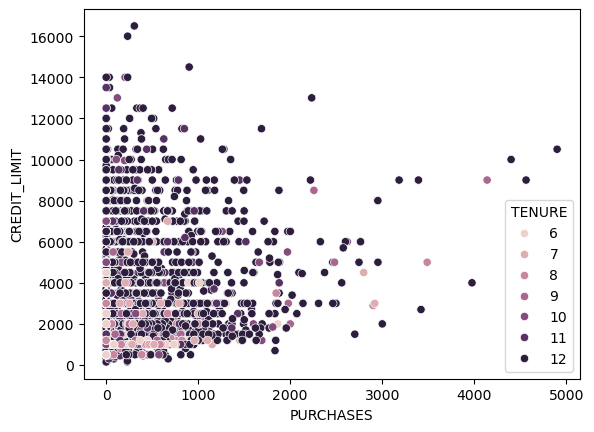

In [399]:
sns.scatterplot(data=cluster_3_df,x='PURCHASES',y='CREDIT_LIMIT',hue='TENURE')

In [401]:
joblib.dump(model,'model_kmeans_k4.pkl')

['model_kmeans_k4.pkl']

In [411]:
model.predict(scaled_df.iloc[[1000]])

array([3], dtype=int32)

In [415]:
model.predict(df.iloc[[1000]])

array([0], dtype=int32)

In [427]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df,cluster_df['cluster'],random_state=42)
print(score)

-0.04147307912750477
